In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io


class signal_mono: 
    
    def normaliser(self):
        M = np.max(abs(self.x))
        self.x = self.x/M
        
## on conviendra que les champs d'un signal_mono sont : 
##  signal.x  : les valeurs du signal 
##  signal.N= : le nombre d'échantillons 
##  signal.Fs : la frequence d'echantillonnage en Hz
##  signal.t : le vecteur des temps associé
## EXEMPLE D'APPLICATION :  plt.plot(signal.t,signal.x)





def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 


def creer_signal(valeurs,Fs):
    out = signal_mono()
    out.x = normaliser_son_mono(valeurs)
    out.N= np.size(out.x)
    out.Fs=Fs
    out.t=np.arange(out.N)/Fs
    return out

def extraire(signal,t_min,t_max):
    condition = ( signal.t   < t_max )*( signal.t > t_min)
    out= signal_mono
    out.x = np.extract(condition,signal.x)
    out.t=np.extract(condition,signal.t)
    out.N= signal.N
    out.Fs=signal.Fs
    return out

def enregistrer_son(nom_fichier,signal,Fs):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav

Part1
1)

In [97]:
def creer_signal_periodique(Phase, Gain, f0, T, Fs):
    values = np.zeros(T.size)
    
    for t in range(0, T.size):

        for n in range (0, Gain.size):
            #values[t] += Gain[n] * np.cos(2*np.pi*n*f0*t + Phase[n])
            values[t] += Gain[n] * np.cos(2*np.pi*(2*n + 1)*f0*t + Phase[n])
        
        # Test pour former signal rect
        values[t] *= (2/np.pi)
        values[t] += 1/2
    
    signal = creer_signal(values, Fs)
    
    return signal

Part1 2)

In [94]:
def phase(T):
    phase = np.random.uniform(-np.pi, np.pi, T)
    #phase = np.zeros(T)
    #print(phase)
    return phase

def gain(T):
    #gain = np.arange(T)
    gain = np.arange(T, dtype=np.double)
    for l in range(gain.size):
        gain[l] = ((-1)**l) / (2*l +1)
        #gain[l] = 1
    return gain

Part1 3)

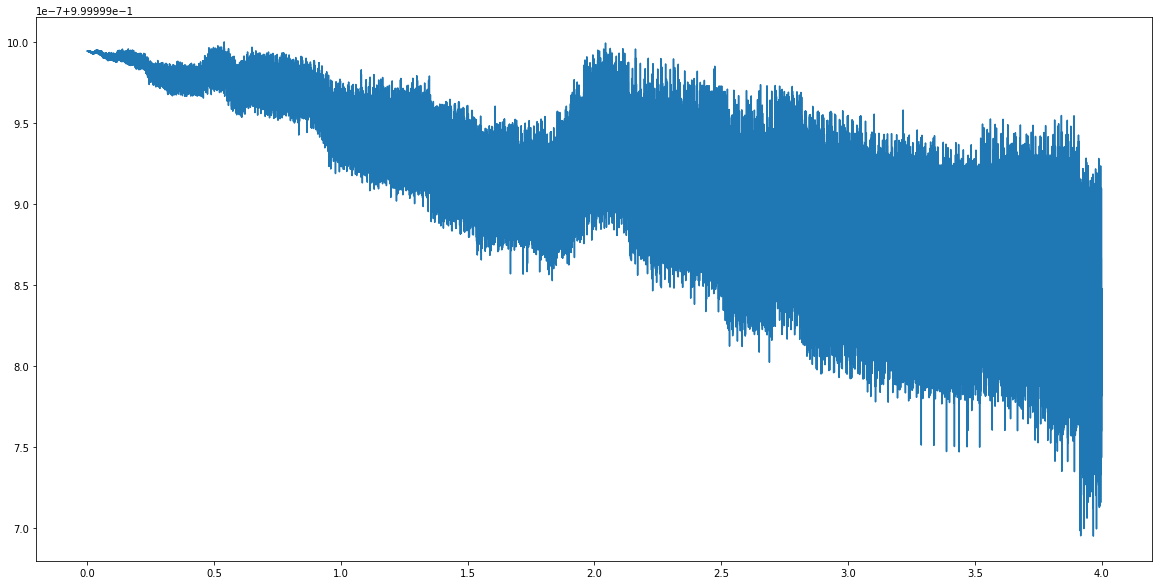

In [98]:
N = 20
f0 = 440
Fs = 22050
Ts = 1/Fs
T = np.arange(0, 4, Ts)
Gain = gain(N)
Phase = phase(N)

signalRectEven = creer_signal_periodique(Phase, Gain, f0, T, Fs)
#signalRectEven.normaliser()

plt.figure(1, figsize = (20, 10))
plt.plot(signalRectEven.t, signalRectEven.x)
#plt.xlim(signalRectEven.Fs, signalRectEven.Fs + 0.01*signalRectEven.Fs)

#enregistrer_son("dqdq", signalRectEven, Fs)